<a href="https://colab.research.google.com/github/aawanRahman/latent-dirichlet-allocation/blob/master/topic_modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#checking the device property...
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7906012918408224510
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10152054765999907514
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2408798757239145726
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7304675328
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5544276523308925350
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [0]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer

from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models


import gensim


## **Dataset Load**

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/topic modelling/voted-kaggle-dataset.csv')

In [5]:
print(dataset.head())

                         Title  ...                                        Description
0  Credit Card Fraud Detection  ...  The datasets contains transactions made by cre...
1     European Soccer Database  ...  The ultimate Soccer database for data analysis...
2      TMDB 5000 Movie Dataset  ...  Background\nWhat can we say about the success ...
3    Human Resources Analytics  ...  This dataset is simulated\nWhy are our best an...
4    Global Terrorism Database  ...  Context\nInformation on more than 170,000 Terr...

[5 rows x 15 columns]


In [6]:
dataset.iloc[0:3,:]

,Title,Subtitle,Owner,Votes,Last Update,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1233,2016-11-05,crime\nfinance,CSV,144 MB,ODbL,"440,221 views","52,793 downloads","1,778 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1035,2016-10-24,association football\neurope,SQLite,299 MB,ODbL,"393,924 views","46,025 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1018,2017-09-28,film,CSV,44 MB,Other,"444,535 views","61,705 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2885 non-null   object
 1   Subtitle     2413 non-null   object
 2   Owner        2885 non-null   object
 3   Votes        2885 non-null   int64 
 4   Last Update  2885 non-null   object
 5   Tags         1700 non-null   object
 6   Data Type    2885 non-null   object
 7   Size         2885 non-null   object
 8   License      2885 non-null   object
 9   Views        2874 non-null   object
 10  Download     2803 non-null   object
 11  Kernels      1276 non-null   object
 12  Topics       2243 non-null   object
 13  URL          2885 non-null   object
 14  Description  2874 non-null   object
dtypes: int64(1), object(14)
memory usage: 338.2+ KB


# **Data Preprocessing**

## **total tag counts.**

In [8]:
dataset.columns.values

array(['Title', 'Subtitle', 'Owner', 'Votes', 'Last Update', 'Tags',
       'Data Type', 'Size', 'License', 'Views', 'Download', 'Kernels',
       'Topics', 'URL', 'Description'], dtype=object)

In [0]:
modified_dataset = dataset.loc[ : , ['Title','Subtitle','Description']]

In [10]:
modified_dataset.iloc[0:5,:]

,Title,Subtitle,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",Background\nWhat can we say about the success ...
3,Human Resources Analytics,Why are our best and most experienced employee...,This dataset is simulated\nWhy are our best an...
4,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...","Context\nInformation on more than 170,000 Terr..."


In [11]:
print(modified_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2885 non-null   object
 1   Subtitle     2413 non-null   object
 2   Description  2874 non-null   object
dtypes: object(3)
memory usage: 67.7+ KB
None


In [12]:
modified_dataset.isnull()

,Title,Subtitle,Description
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2880,False,True,False
2881,False,True,False
2882,False,True,False
2883,False,True,False


In [13]:
print(modified_dataset.isnull().sum())
print("total null values : ",sum(modified_dataset.isnull().values.ravel()))
print("total number of rows containing null values : ", sum([True for idx,row in modified_dataset.iterrows() if any(row.isnull())]))


Title            0
Subtitle       472
Description     11
dtype: int64
total null values :  483
total number of rows containing null values :  482


now we will remove the rows containing any missing values.

In [0]:
modified_dataset = modified_dataset.dropna()

In [15]:
print("total null values : ",sum(modified_dataset.isnull().values.ravel()))
print("total number of rows containing null values : ", sum([True for idx,row in modified_dataset.iterrows() if any(row.isnull())]))

total null values :  0
total number of rows containing null values :  0


selecting  the columns that are  used in training phase.

In [16]:
print(modified_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2403 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2403 non-null   object
 1   Subtitle     2403 non-null   object
 2   Description  2403 non-null   object
dtypes: object(3)
memory usage: 75.1+ KB
None


removing punctuation and stopwords and lower casing 

In [0]:
import string
import re

In [0]:

remove_digits = str.maketrans('', '', string.digits) # Set of all digits

In [0]:
for column in ['Title','Subtitle','Description']:
  modified_dataset[column] = modified_dataset[column].map(lambda x : x.lower())


In [20]:
modified_dataset.iloc[0:3,:]

,Title,Subtitle,Description
0,credit card fraud detection,anonymized credit card transactions labeled as...,the datasets contains transactions made by cre...
1,european soccer database,"25k+ matches, players & teams attributes for e...",the ultimate soccer database for data analysis...
2,tmdb 5000 movie dataset,"metadata on ~5,000 movies from tmdb",background\nwhat can we say about the success ...


In [0]:
exclude = '[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'


In [0]:
for column in ['Title','Subtitle','Description']:
  modified_dataset[column] = modified_dataset[column].map(lambda x : x.translate(remove_digits))
  modified_dataset[column] = modified_dataset[column].map(lambda x : re.sub(str(exclude), '', x))


  

In [23]:
modified_dataset.iloc[0:3,:]

,Title,Subtitle,Description
0,credit card fraud detection,anonymized credit card transactions labeled as...,the datasets contains transactions made by cre...
1,european soccer database,k matches players teams attributes for europe...,the ultimate soccer database for data analysis...
2,tmdb movie dataset,metadata on movies from tmdb,background\nwhat can we say about the success ...


now we use stemming and lemmalization for preprocessing the data.


counting the number of unique tags

In [24]:
tag_dataset = dataset['Tags']
tag_dataset.isnull().sum()
#tag_dataset=tag_dataset.dropna()
tag_dataset.isnull().sum()

1185

In [25]:
print(len(tag_dataset))

2885


In [0]:
def convert(lst): 
    return (lst.split("\n"))

In [27]:

unique_tag = []
for i in range(len(tag_dataset)):
  tag_string = str(tag_dataset[i])
  if tag_string != "nan" :
    tag_word=convert(tag_string)
    for j in range(len(tag_word)):
      if tag_word[j] not in unique_tag:
        unique_tag.append(tag_word[j])
print(len(unique_tag))

329


In [99]:
for i in range(len(unique_tag)):
  print(unique_tag[i])

crime
finance
association football
europe
film
employment
terrorism
international relations
history
sociology
artificial intelligence
botany
economics
news agencies
popular culture
games and toys
video games
critical theory
food and drink
environment
climate
nutrition
universities and colleges
education
healthcare
linguistics
internet
emotion
social sciences
clothing
image data
multiclass classification
object identification
politics
literature
social groups
war
love
home
housing
business
demographics
society
mental health
human genetics
+ 2 more...
personality
brazil
public health
twitter
aviation
gender
law
psychometrics
telecommunications
languages
road transport
income
space
death
cricket
india
humor
mass media
world
sports
sound technology
statistics
automobiles
children
pollution
management
united states
violence
basketball
human-computer interaction
celebrity
humans
astronomy
reddit
information technology
baseball
neuroscience
parties
cities
board games
music
crowdfunding
health

In [29]:
import nltk
nltk.download('punkt')
tokenized_dataframe =  modified_dataset.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
print(type(tokenized_dataframe))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<class 'pandas.core.series.Series'>


In [30]:
print(tokenized_dataframe[0:3])


0    [the, datasets, contains, transactions, made, ...
1    [the, ultimate, soccer, database, for, data, a...
2    [background, what, can, we, say, about, the, s...
dtype: object


In [31]:
#single word check......
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
print(ps.stem('contains'))

contain


In [0]:

def lemmatize_text(text):
    return [ps.stem(w)  for w in text if len(w)>5]

In [33]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
stemmed_dataset = tokenized_dataframe.apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [34]:
print(type(stemmed_dataset))

<class 'pandas.core.series.Series'>


In [35]:
stemmed_dataset[0:3]

0    [dataset, contain, transact, credit, septemb, ...
1    [ultim, soccer, databas, analysi, machin, lear...
2    [background, success, befor, releas, certain, ...
dtype: object

## **Exploratory Analysis**

<class 'str'>


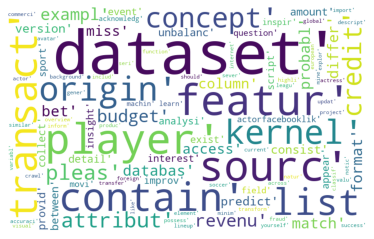

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#dataset_words=''
#for column in ['Title','Subtitle','Description']:
dataset_words=''.join(list(str(stemmed_dataset.values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',  
                min_font_size = 10).generate(dataset_words) 

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## **Creating Dictionary and corpus for LDA model**

In [37]:
dictionary_of_words = gensim.corpora.Dictionary(stemmed_dataset)
print(type(dictionary_of_words))

<class 'gensim.corpora.dictionary.Dictionary'>


In [38]:
print(len(dictionary_of_words))


24620


In [0]:
# Creatig coupus which contains  of word id mapping with word_frequency--->(word_id, word_frequency) 
word_corpus = [dictionary_of_words.doc2bow(word) for word in stemmed_dataset]

In [40]:
for corp in word_corpus[:1]:
  for id, freq in corp:
    print(dictionary_of_words[id],freq)

account 1
accuraci 2
amount 3
analys 1
andrea 1
avail 1
background 1
between 1
bontempi 1
bruxel 1
caelen 1
calibr 1
cardhold 1
classif 2
collabor 1
collect 1
compon 1
comput 1
confidenti 1
confus 1
contain 3
costsenst 1
credit 1
current 1
dataset 5
detail 1
detect 1
dure 1
elaps 1
european 1
exampledepend 1
featur 7
fraud 2
gianluca 1
highli 1
httpmlgulbacb 1
httpmlgulbacbeartml 1
httpmlgulbacbebruf 1
imbal 1
inform 1
intellig 1
issu 1
johnson 1
learn 2
machin 1
matrix 1
meaning 1
measur 1
mine 2
numer 1
obtain 1
occur 1
olivi 1
origin 1
otherwis 1
pleas 1
posit 1
pozzolo 1
precisionrecal 1
present 1
princip 1
probabl 1
project 1
provid 1
recommend 1
relat 1
research 1
respons 1
result 1
second 1
septemb 1
symposium 1
topic 1
transact 7
transform 2
unbalanc 3
undersampl 1
unfortun 1
université 1
variabl 2
worldlin 1


## **Building LDA model**

In [42]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=word_corpus,
                                           id2word=dictionary_of_words,
                                           num_topics=329, 
                                           random_state=101,
                                           update_every=1,
                                           chunksize=300,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [0]:
print(lda_model.print_topics())

[(139, '0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 0.000*"lakadsensgmailcom" + 0.000*"declarado"'), (10, '0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 0.000*"lakadsensgmailcom" + 0.000*"declarado"'), (92, '0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 0.000*"lakadsensgmailcom" + 0.000*"declarado"'), (6, '0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 0.000*"lakadsensgmailcom" + 0.000*"declarado"'), (154, '0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.754*"univers" + 0.117*"institut" + 0.037*"regard" + 0.020*"camera" + 0.008*"fill" + 0.000*"candidato" + 0.000*"característica" + 0.000*"conclusão" + 0.000*"deputado" + 0.000*"declarado"
Topic: 1 
Words: 0.394*"learn" + 0.324*"machin" + 0.103*"american" + 0.025*"societi" + 0.025*"unknown" + 0.022*"repositori" + 0.014*"donat" + 0.006*"enjoy" + 0.006*"clearli" + 0.003*"leaflet"
Topic: 2 
Words: 0.513*"properti" + 0.196*"clean" + 0.034*"afford" + 0.009*"ladder" + 0.003*"rise" + 0.000*"conclusão" + 0.000*"característica" + 0.000*"declarado" + 0.000*"doaçõ" + 0.000*"deputado"
Topic: 3 
Words: 0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 0.000*"lakadsensgmailcom" + 0.000*"declarado"
Topic: 4 
Words: 0.000*"conclusão" + 0.000*"criado" + 0.000*"antun" + 0.000*"candidato" + 0.000*"característica" + 0.000*"robotsthi" + 0.000*"disponibilizar" + 0.000*"deputado" + 

In [43]:

from gensim.models.coherencemodel import CoherenceModel

coherence_val = CoherenceModel(model=lda_model, texts=stemmed_dataset, dictionary=dictionary_of_words, coherence='c_v').get_coherence()

print('Coherence Score: ', coherence_val)

Coherence Score:  0.4049046232597778


Now will change the number of topics.. increasing it from 10 to 280 to find for which number of topic the model givers the better result.

In [0]:
models=[]
coherence_value = []
for topic_number in range(10,331,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=word_corpus,
                                           id2word=dictionary_of_words,
                                           num_topics=topic_number, 
                                           random_state=101,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)
  models.append(lda_model)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=stemmed_dataset, dictionary=dictionary_of_words, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_value.append(coherence_lda)
  print("number of topics ",topic_number,"coherence_value :" , coherence_lda)


  



number of topics  10 coherence_value : 0.4653519035892977
number of topics  20 coherence_value : 0.4550750398971183
number of topics  30 coherence_value : 0.44863968258604214
number of topics  40 coherence_value : 0.4547481059253995
number of topics  50 coherence_value : 0.44301625072325157
number of topics  60 coherence_value : 0.46445707924657637
number of topics  70 coherence_value : 0.45624869542098273
number of topics  80 coherence_value : 0.4203470515461817
number of topics  90 coherence_value : 0.4351616717015385


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


number of topics  100 coherence_value : 0.3763536733136574
number of topics  110 coherence_value : 0.3708493032022244
number of topics  120 coherence_value : 0.378068715541249
number of topics  130 coherence_value : 0.3622266272804484
number of topics  140 coherence_value : 0.37962929112422766
number of topics  150 coherence_value : 0.3597523548671496
number of topics  160 coherence_value : 0.3628240549325654
number of topics  170 coherence_value : 0.3551351508307952
number of topics  180 coherence_value : 0.36675278827360513
number of topics  190 coherence_value : 0.35207241122889305
number of topics  200 coherence_value : 0.3537770200770528
number of topics  210 coherence_value : 0.361980150523584
number of topics  220 coherence_value : 0.36081005515755327
number of topics  230 coherence_value : 0.35287025691724966
number of topics  240 coherence_value : 0.350588711476604
number of topics  250 coherence_value : 0.3530185667668948
number of topics  260 coherence_value : 0.358781731099

In [0]:
print("dsss",2,"sdfsdf",4)

dsss 2 sdfsdf 4


In [0]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=word_corpus,
                                           id2word=dictionary_of_words,
                                           num_topics=60, 
                                           random_state=1,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

In [49]:

from gensim.models.coherencemodel import CoherenceModel


# Compute Coherence Score
cohr_val = CoherenceModel(model=lda_model1, texts=stemmed_dataset, dictionary=dictionary_of_words, coherence='c_v').get_coherence()

print('\nCoherence Score: ', cohr_val)


Coherence Score:  0.45274439234199604


In [0]:
from gensim.test.utils import common_corpus, common_dictionary
lda_multicore_model = gensim.models.ldamulticore.LdaMulticore(corpus=word_corpus, 
                                                              num_topics=60, 
                                                              id2word=dictionary_of_words,                                                             
                                                              chunksize=100, 
                                                              passes=50,                                
                                                              alpha='symmetric',
                                                              eta=0.1,
                                                              decay=0.5, 
                                                              offset=1.0, 
                                                              gamma_threshold=0.001,
                                                              random_state=101,
                                                              minimum_probability=0.01,
                                                              minimum_phi_value=0.01,
                                                              per_word_topics=False)

In [52]:
from gensim.models.coherencemodel import CoherenceModel


# Compute Coherence Score
cohr_lda_multicore_model1 = CoherenceModel(model=lda_multicore_model, texts=stemmed_dataset, dictionary=dictionary_of_words, coherence='c_v').get_coherence()

print('\nCoherence Score: ', cohr_lda_multicore_model1)


Coherence Score:  0.500895728531509


In [0]:
from gensim.test.utils import common_corpus, common_dictionary
lda_multicore_model2 = gensim.models.ldamulticore.LdaMulticore(corpus=word_corpus, 
                                                              num_topics=329, 
                                                              id2word=dictionary_of_words,                                                             
                                                              chunksize=100, 
                                                              passes=50,                                
                                                              alpha='symmetric',
                                                              eta=0.1,
                                                              decay=0.5, 
                                                              offset=1.0, 
                                                              gamma_threshold=0.001,
                                                              random_state=101,
                                                              minimum_probability=0.01,
                                                              minimum_phi_value=0.01,
                                                              per_word_topics=False)

In [54]:
from gensim.models.coherencemodel import CoherenceModel


# Compute Coherence Score
cohr_lda_multicore_model2 = CoherenceModel(model=lda_multicore_model2, texts=stemmed_dataset, dictionary=dictionary_of_words, coherence='c_v').get_coherence()

print('\nCoherence Score: ', cohr_lda_multicore_model2)


Coherence Score:  0.40031940029702423


## **Evaluation**

In [96]:
v = lda_model[word_corpus[2]]
print(type(lda_model[word_corpus[2]]))
z=sorted(v[0], key=lambda tup: -1*tup[1])
print(z)
print(v[0])

<class 'tuple'>
[(27, 0.20599864), (101, 0.07712153), (33, 0.05804071), (302, 0.034482528), (69, 0.032778475), (14, 0.030817678), (49, 0.02679516), (77, 0.023056721), (30, 0.018040096), (156, 0.015705438), (15, 0.015044093), (146, 0.012555125), (53, 0.012308318), (236, 0.012272188), (235, 0.012073053), (169, 0.011946721), (55, 0.011577829), (194, 0.011440581), (253, 0.011361394)]
[(14, 0.030817678), (15, 0.015044093), (27, 0.20599864), (30, 0.018040096), (33, 0.05804071), (49, 0.02679516), (53, 0.012308318), (55, 0.011577829), (69, 0.032778475), (77, 0.023056721), (101, 0.07712153), (146, 0.012555125), (156, 0.015705438), (169, 0.011946721), (194, 0.011440581), (235, 0.012073053), (236, 0.012272188), (253, 0.011361394), (302, 0.034482528)]


In [95]:
for  index,score in sorted(lda_model[word_corpus[2]][0], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.20599859952926636	 
Topic: 0.112*"registr" + 0.101*"revenu" + 0.089*"figur" + 0.067*"budget" + 0.066*"client" + 0.042*"check" + 0.036*"basic" + 0.032*"treat" + 0.028*"complic" + 0.025*"limit"

Score: 0.07712119817733765	 
Topic: 0.143*"includ" + 0.139*"inform" + 0.082*"avail" + 0.076*"provid" + 0.068*"differ" + 0.060*"origin" + 0.044*"gener" + 0.044*"detail" + 0.035*"version" + 0.033*"sourc"

Score: 0.058055225759744644	 
Topic: 0.375*"dataset" + 0.207*"contain" + 0.077*"follow" + 0.062*"creat" + 0.034*"process" + 0.034*"download" + 0.027*"perform" + 0.022*"variou" + 0.017*"multipl" + 0.016*"befor"

Score: 0.0344846136868	 
Topic: 0.201*"public" + 0.151*"pleas" + 0.111*"research" + 0.106*"field" + 0.102*"through" + 0.085*"across" + 0.045*"cover" + 0.022*"paper" + 0.019*"rather" + 0.018*"prepar"

Score: 0.032669298350811005	 
Topic: 0.184*"content" + 0.179*"acknowledg" + 0.175*"context" + 0.174*"dataset" + 0.155*"inspir" + 0.045*"sourc" + 0.019*"websit" + 0.012*"analyz" + 0.00

topic 14 got the highest probability and it is related to something like economic

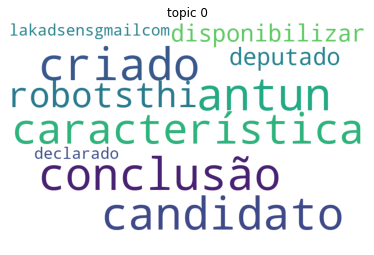

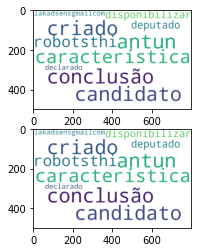

In [112]:


topics = lda_model.show_topics(formatted=False)
topic_words = dict(topics[0][1])
wordcloud.generate_from_frequencies(topic_words, max_font_size=100)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.title("topic 0")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 





plt.figure(1)
plt.subplot(211)

plt.imshow(wordcloud)

plt.subplot(212)
plt.imshow(wordcloud)
plt.show()

Text(0.5, 1.0, 'topic 1')

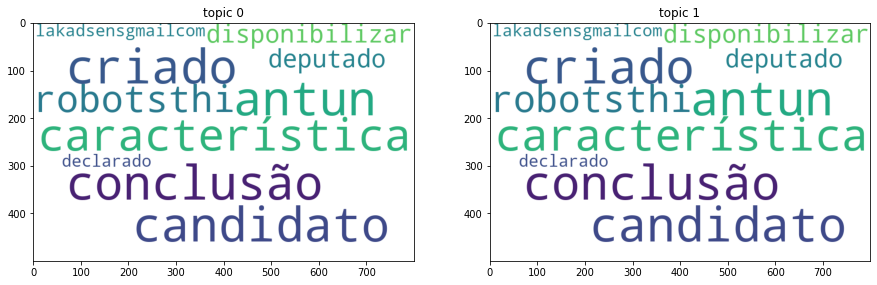

In [122]:

fig = plt.figure(figsize=(15,15),frameon=0)
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(wordcloud)
a.set_title('topic 0')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(wordcloud)

a.set_title('topic 1')
